In [77]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [9]:
# load the image files
bead_date =20200611
bead_number = 1
dataset = "/Shaking/"
FOI = "NoShakingTest1"
filename = "/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures_0/" + FOI
data = load_npy_files(path=filename+"*",max_files=10000)

/data/new_trap/20200605/Bead1//Shaking/Pictures_0/NoShakingTest1_0.npy 0
/data/new_trap/20200605/Bead1//Shaking/Pictures_0/NoShakingTest1_1.npy 1
/data/new_trap/20200605/Bead1//Shaking/Pictures_0/NoShakingTest1_2.npy 2
/data/new_trap/20200605/Bead1//Shaking/Pictures_0/NoShakingTest1_3.npy 3
/data/new_trap/20200605/Bead1//Shaking/Pictures_0/NoShakingTest1_4.npy 4
/data/new_trap/20200605/Bead1//Shaking/Pictures_0/NoShakingTest1_5.npy 5


In [11]:
pixel_size_cal = 0.503 # obtained from attractor calibration data February2020, but cross checked during Wilson itself
attractor_0 = 241 # 0 position of attractor as extrapolated from image analysis of z=50 and z=27. Obtained from Wilson attractor screening.

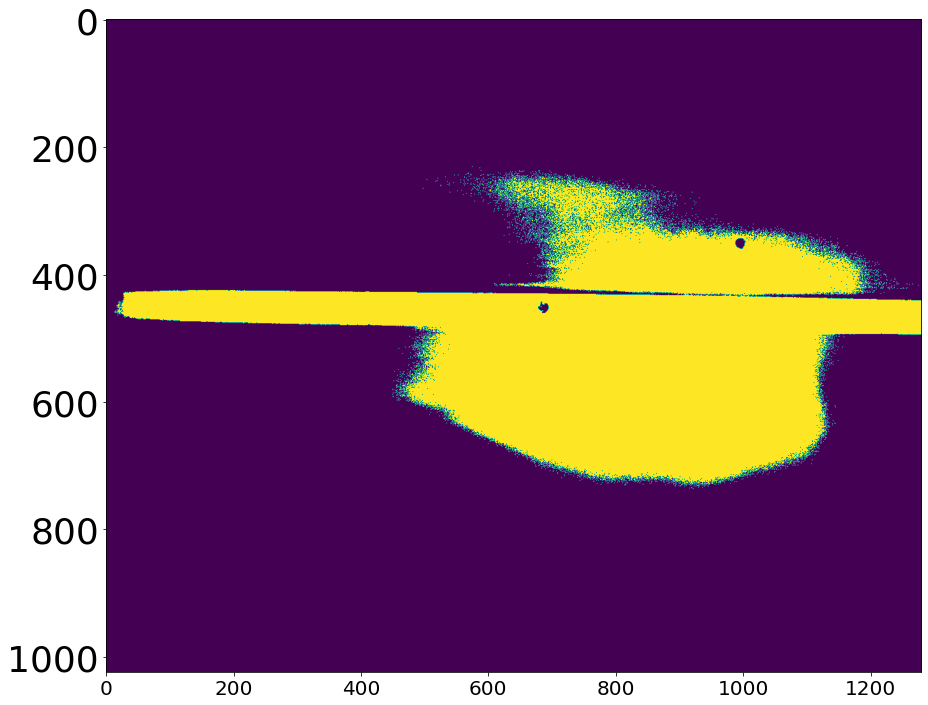

In [58]:
ret,thresh = cv2.threshold(data[0],254,255,0)

plt.imshow(thresh)

  0%|          | 0/6 [00:00<?, ?it/s]

2.226191026213408


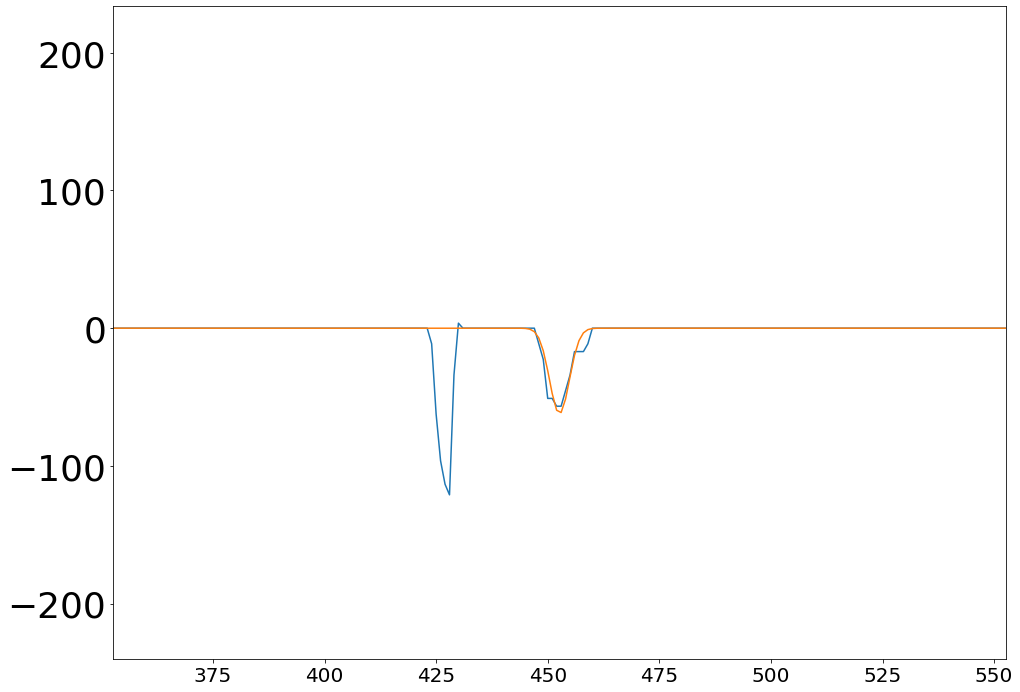

 17%|█▋        | 1/6 [00:00<00:00,  5.99it/s]

2.1612170996120343


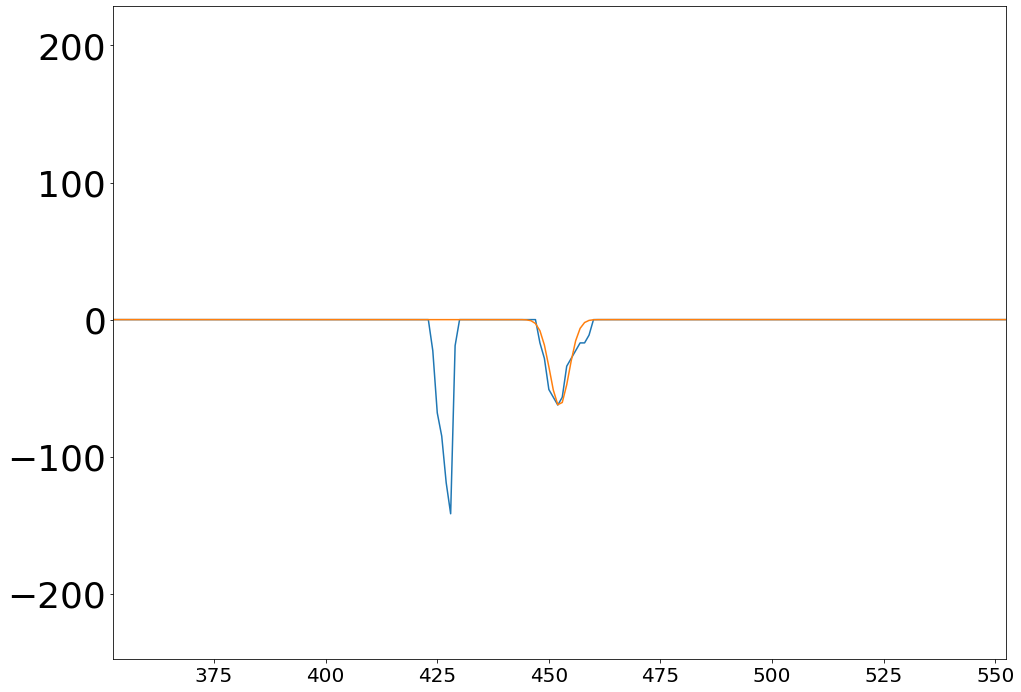

 33%|███▎      | 2/6 [00:00<00:00,  6.00it/s]

2.2222765633560475


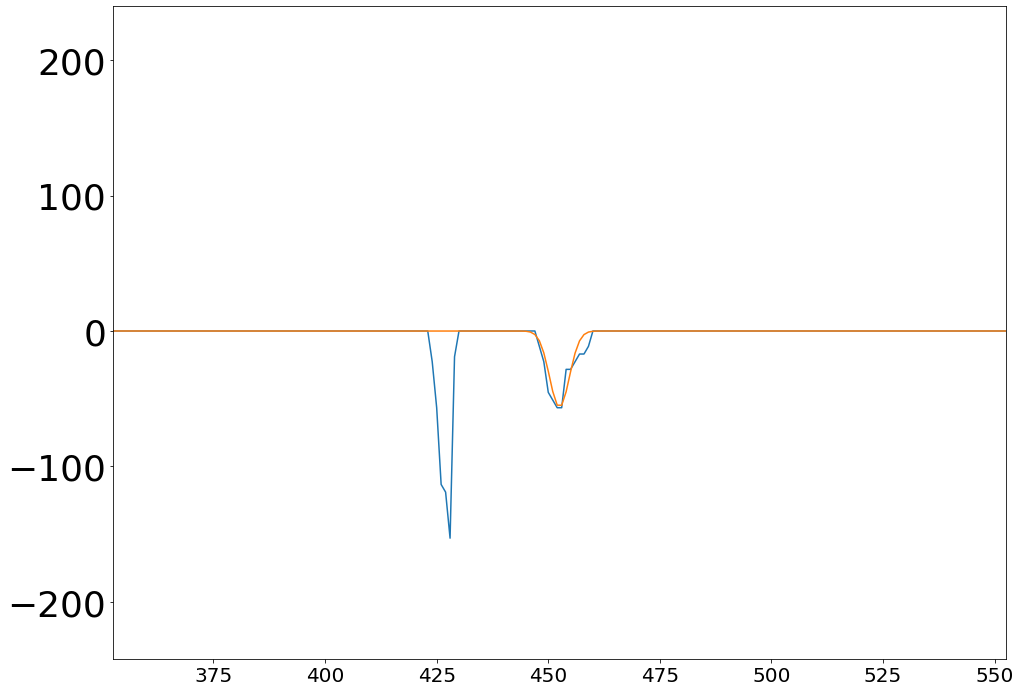

 50%|█████     | 3/6 [00:00<00:00,  6.03it/s]

2.177035663919181


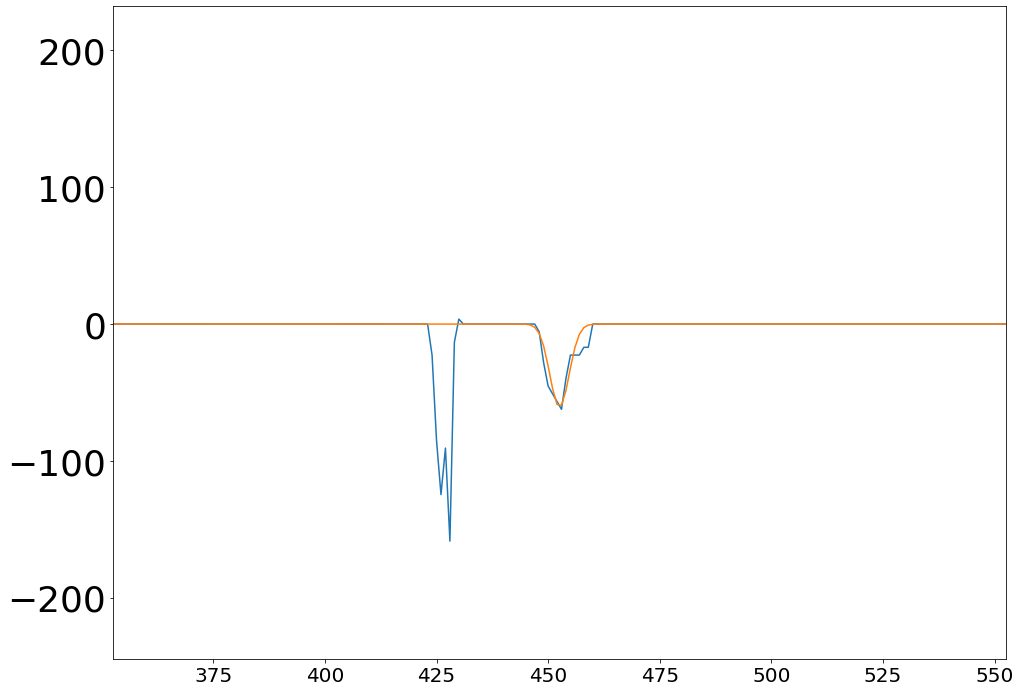

 67%|██████▋   | 4/6 [00:00<00:00,  6.07it/s]

2.264788661627141


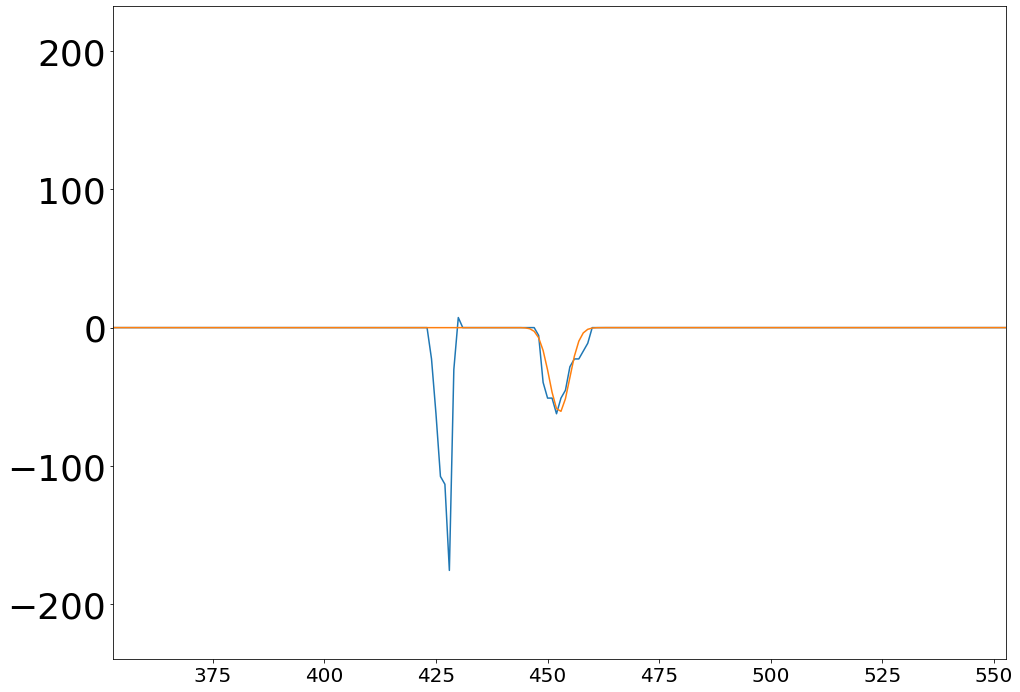

 83%|████████▎ | 5/6 [00:00<00:00,  6.05it/s]

0.0038506003542576606


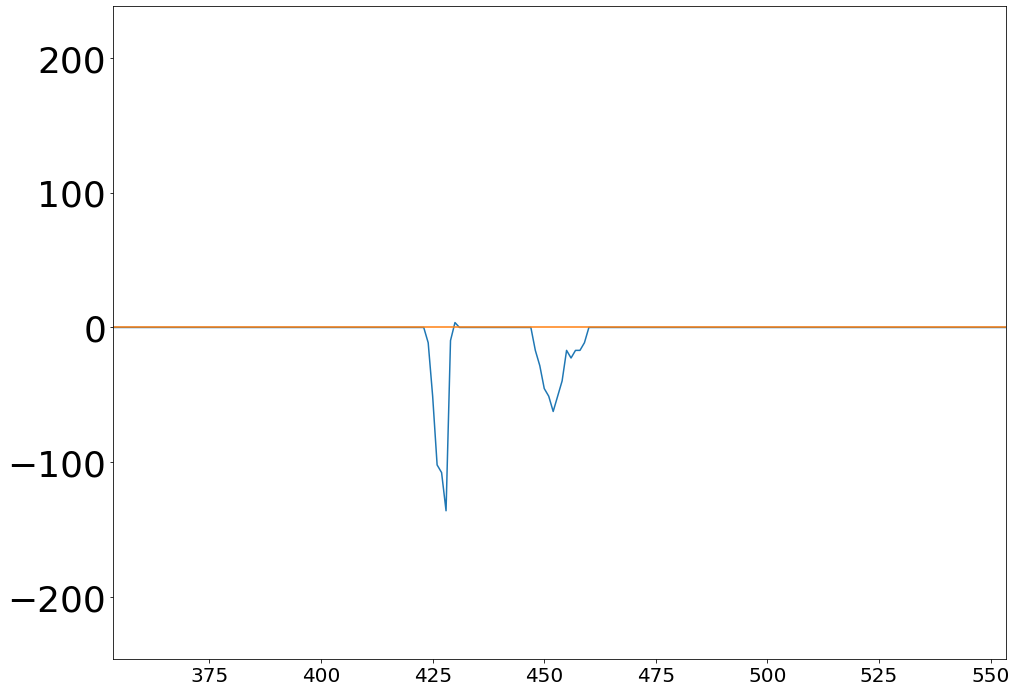

100%|██████████| 6/6 [00:00<00:00,  6.18it/s]


In [75]:
height = [] # get the height using the shadow method
for i in tqdm(range(len(data))):
    mean, m = from_shadow_image_to_height(data[i],180,area_low_limits=[670,730],area_widths=[45,70],flb=430,fub=500,plot=True)
    height.append(pixel_to_height(mean,calibration=True,pix_size_from_calib=pixel_size_cal))
    print(m.values["sigma"])
    plt.show()